In [1]:
import pandas as pd

# Load the genuine and attack datasets
genuine_df = pd.read_csv("combined_user_features1.csv")
attack_df = pd.read_csv("simulated_attack_dataset.csv")

# Add a label column to each
genuine_df["label"] = "genuine"
attack_df["label"] = "attack"

# Combine both datasets
combined_df = pd.concat([genuine_df, attack_df], ignore_index=True)

# Save the combined dataset
combined_df.to_csv("combined_with_simulated_attacks.csv", index=False)

print("✅ Combined dataset saved as 'combined_with_simulated_attacks.csv'")


✅ Combined dataset saved as 'combined_with_simulated_attacks.csv'


Classification Report:
               precision    recall  f1-score   support

      attack       1.00      1.00      1.00       113
     genuine       1.00      1.00      1.00        15

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

Confusion Matrix:
 [[113   0]
 [  0  15]]


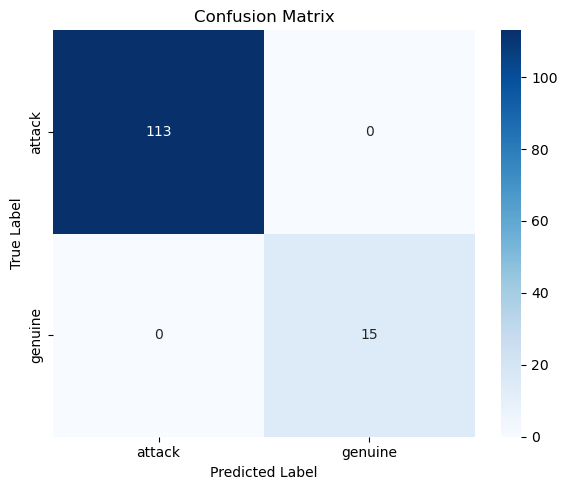

ValueError: Found array with 0 sample(s) (shape=(0, 35)) while a minimum of 1 is required by PCA.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Load the combined dataset
df = pd.read_csv("combined_with_simulated_attacks.csv")

# Step 2: Basic Preprocessing
# Assuming the label column is named 'label' (e.g., 'genuine' or 'attack')
label_col = 'label'
feature_cols = [col for col in df.columns if col != label_col]

# Encode the label: genuine = 0, attack = 1
label_encoder = LabelEncoder()
df[label_col] = label_encoder.fit_transform(df[label_col])

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[feature_cols])
y = df[label_col]

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Step 4: Train the Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("Confusion_Matrix.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Step 6: PCA Visualization (2D)

# Remove any rows with NaNs from the scaled feature set
X_no_nan = pd.DataFrame(X, columns=feature_cols).dropna()
y_no_nan = y[df[feature_cols].dropna().index]

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_no_nan)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=label_encoder.inverse_transform(y_no_nan),
                palette="Set1", alpha=0.7)
plt.title("PCA Projection: Genuine vs Simulated Attacks")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


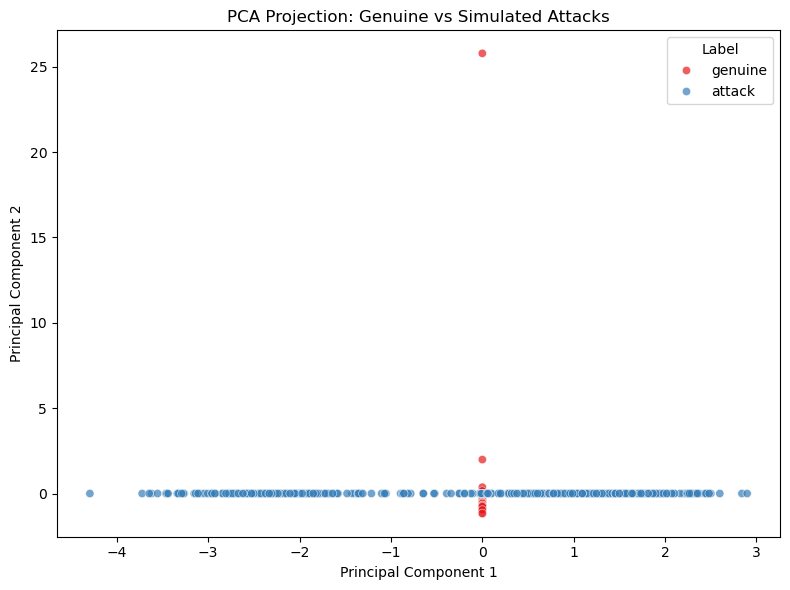

In [4]:
from sklearn.impute import SimpleImputer

# Step 1: Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: PCA Visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Step 3: Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=label_encoder.inverse_transform(y),
                palette="Set1", alpha=0.7)
plt.title("PCA Projection: Genuine vs Simulated Attacks")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


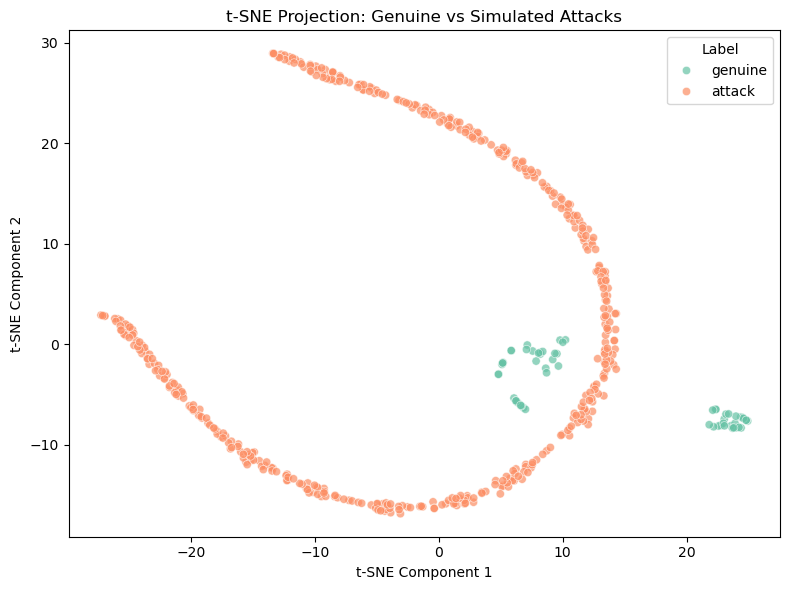

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_imputed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],
                hue=label_encoder.inverse_transform(y),
                palette="Set2", alpha=0.7)
plt.title("t-SNE Projection: Genuine vs Simulated Attacks")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Label")
plt.tight_layout()


plt.savefig("t-SNE_Projection_Genuine_vs_Simulated_Attacks.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Encode labels and prepare data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
X = df.drop(columns=['label'])

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

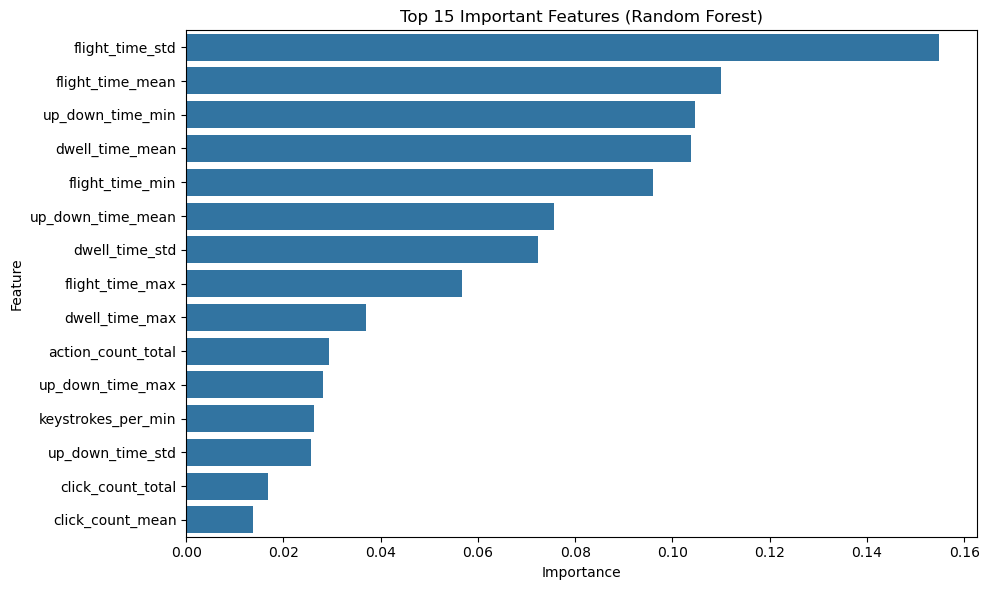

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = X.columns  # This refers to original column names

feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(15), x="Importance", y="Feature")
plt.title("Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


In [13]:
print(label_encoder.classes_)


[0 1]


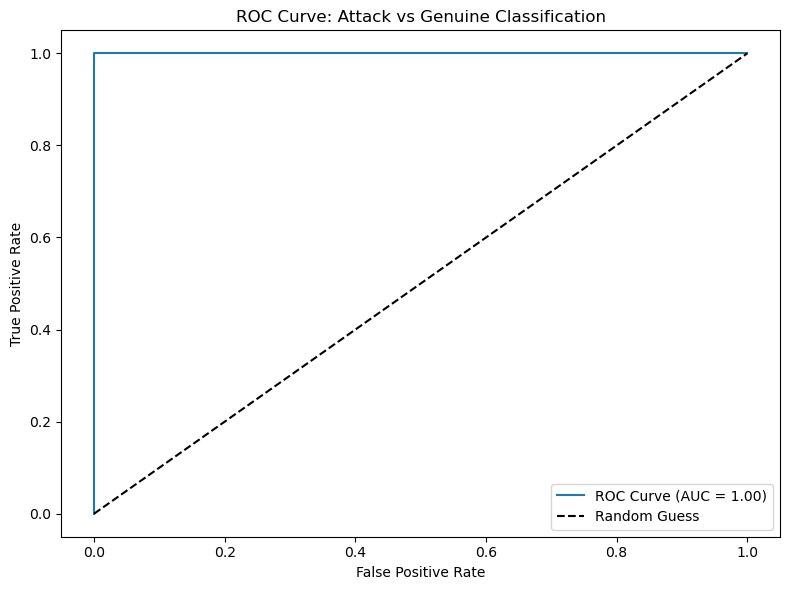

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for class '1' (attack)
y_score = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC (no need to set pos_label if labels are 0 and 1)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Attack vs Genuine Classification")
plt.legend(loc="lower right")
plt.tight_layout()

plt.savefig("ROC_Curve_Attack_vs_Genuine_Classification.pdf", format='pdf', bbox_inches='tight')
plt.show()

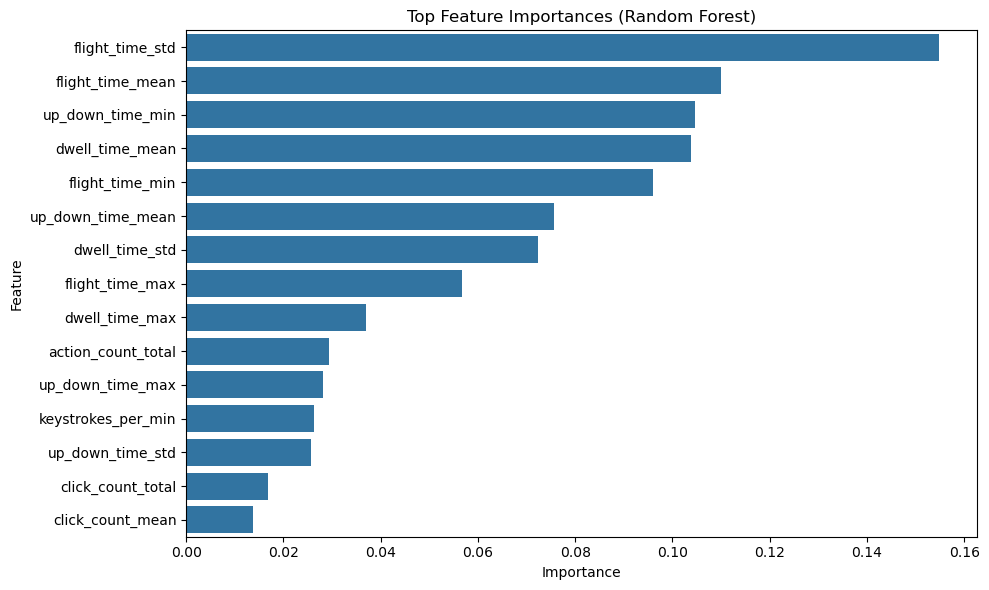

In [16]:
import pandas as pd

importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))  # Show top 15
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


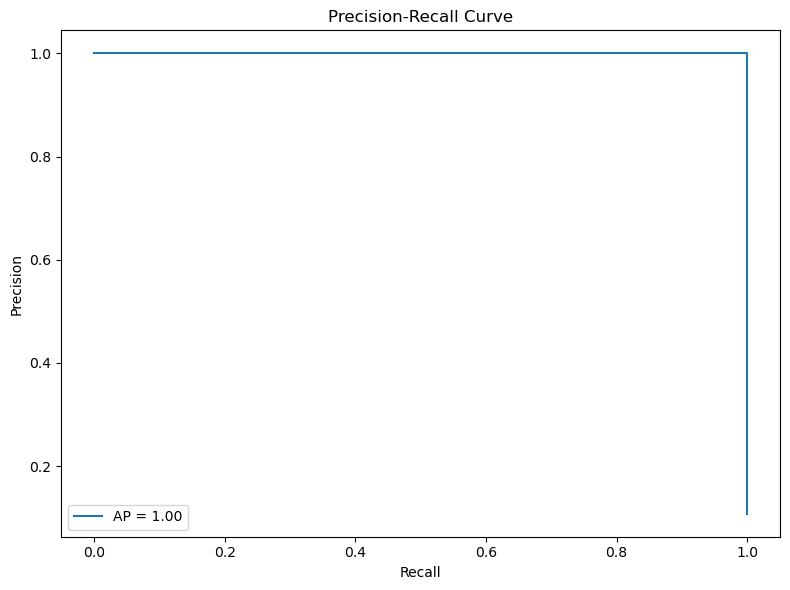

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_score)
avg_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()

plt.savefig("Precision-Recall_Curve.pdf", format='pdf', bbox_inches='tight')
plt.show()


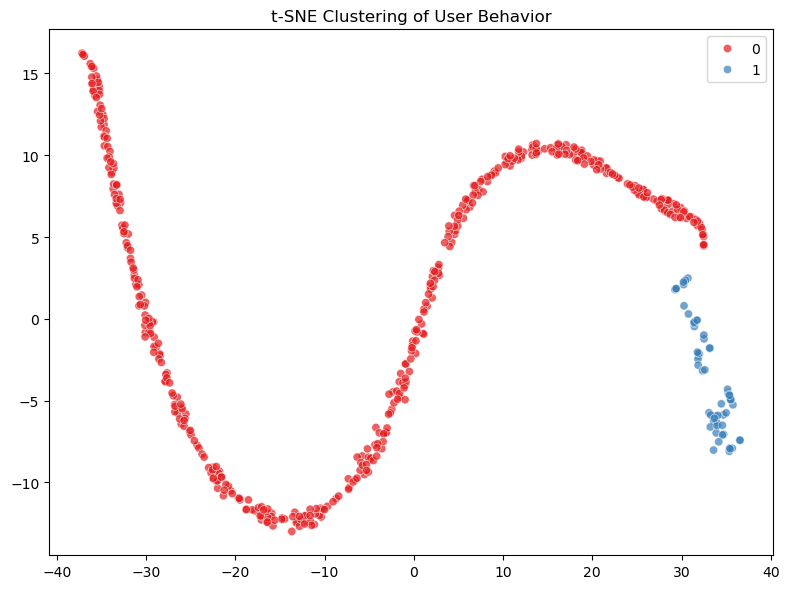

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X.fillna(0))  # or use your cleaned data

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("t-SNE Clustering of User Behavior")
plt.tight_layout()
plt.savefig("t-SNE_Clustering_of_User_Behavior.pdf", format='pdf', bbox_inches='tight')
plt.show()


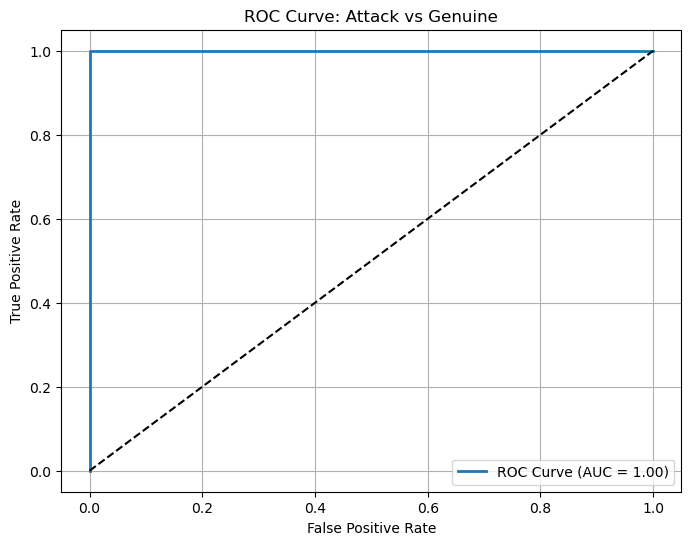

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assume y_test and y_score are already defined
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Attack vs Genuine")
plt.legend(loc="lower right")
plt.grid(True)

# Save as PDF
plt.savefig("roc_curve_attack_vs_genuine.pdf", format='pdf', bbox_inches='tight')

plt.show()
